# Importing the Usual Library
# Trying the Prediction Whether the Given Image is with mask or without mask

In [22]:
import numpy as np
import pandas as pd
#visualization library
import matplotlib.pyplot as plt
#Tensorflow Neural Network
import tensorflow as tf

# Getting the Directory and saving to a variable

In [23]:
train_dir='/kaggle/input/withwithout-mask/maskdata/maskdata/train'
test_dir='/kaggle/input/withwithout-mask/maskdata/maskdata/test'

# Loading the Images

In [24]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,validation_split=0.2)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)

# Getting Imaging flow from directory
train_imagest will import the images in batch size and save to
 the directory after training recyling in the memory again

In [25]:
train_images=train_generator.flow_from_directory(
train_dir,
target_size=(224,224), #resizing the imaging to reduce the size for triaaining
color_mode='rgb',#which type of color chanel
class_mode='binary', #only two type mask and without mask
batch_size=32,
shuffle=True,
seed=42, #we can can reproduce the shuffle
subset='training') 
#validation images
val_images=train_generator.flow_from_directory(
train_dir,
target_size=(224,224), #resizing the imaging to reduce the size for triaaining
color_mode='rgb',#which type of color chanel
class_mode='binary', #only two type mask and without mask
batch_size=32,
shuffle=True,
seed=42, #we can can reproduce the shuffle
subset='validation')


#test images
test_images=test_generator.flow_from_directory(
train_dir,
target_size=(224,224), #resizing the imaging to reduce the size for triaaining
color_mode='rgb',#which type of color chanel
class_mode='binary', #only two type mask and without mask
batch_size=32,
shuffle=False,
)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


# Training the Model

In [26]:
inputs=tf.keras.Input(shape=(224,224,3))
x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                         activation='relu')(inputs)
x=tf.keras.layers.MaxPool2D()(x)

x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),
                         activation='relu')(x)
x=tf.keras.layers.MaxPool2D()(x)

x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080

# Compiling the Model

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images,validation_data=val_images,
                  epochs=100,
                 callbacks=[
                     tf.keras.callbacks.EarlyStopping(
                     monitor='val_loss',
                     patience=5,
                     restore_best_weights=True)
                 ])

Epoch 1/100
16/16 [==============================] - 4s 198ms/step - loss: 0.6918 - accuracy: 0.5172 - val_loss: 0.6846 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 3s 179ms/step - loss: 0.6828 - accuracy: 0.5538 - val_loss: 0.6810 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 3s 162ms/step - loss: 0.6807 - accuracy: 0.5578 - val_loss: 0.6749 - val_accuracy: 0.5691
Epoch 4/100
16/16 [==============================] - 2s 156ms/step - loss: 0.6747 - accuracy: 0.6004 - val_loss: 0.6651 - val_accuracy: 0.5854
Epoch 5/100
16/16 [==============================] - 2s 155ms/step - loss: 0.6712 - accuracy: 0.5680 - val_loss: 0.6620 - val_accuracy: 0.7398
Epoch 6/100
16/16 [==============================] - 3s 170ms/step - loss: 0.6649 - accuracy: 0.6247 - val_loss: 0.6540 - val_accuracy: 0.7398
Epoch 7/100
16/16 [==============================] - 3s 201ms/step - loss: 0.6435 - accuracy: 0.6592 - val_loss: 0.6488 - val_accuracy: 0.5935

# Evaluating the Model

In [29]:
results=model.evaluate(test_images,verbose=0)
print('Loss:{:5f}'.format(results[0]))
print('Accuracy:{:.3f}%'.format(results[1]*100))

Loss:0.119636
Accuracy:96.429%


# Visualizing the Results

In [30]:
sample_generator=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)



#test images
sample_images=test_generator.flow_from_directory(
train_dir,
target_size=(224,224), #resizing the imaging to reduce the size for triaaining
color_mode='rgb',#which type of color chanel
class_mode='binary', #only two type mask and without mask
batch_size=32,
shuffle=True,
    seed=42
)


Found 616 images belonging to 2 classes.


In [31]:
samples=sample_images.next()

In [32]:
samples

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [34]:
predictions=np.squeeze(model.predict(samples[0])>=0.5).astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [36]:
labels=samples[1].astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [38]:
test_images.class_indices

{'with_mask': 0, 'without_mask': 1}

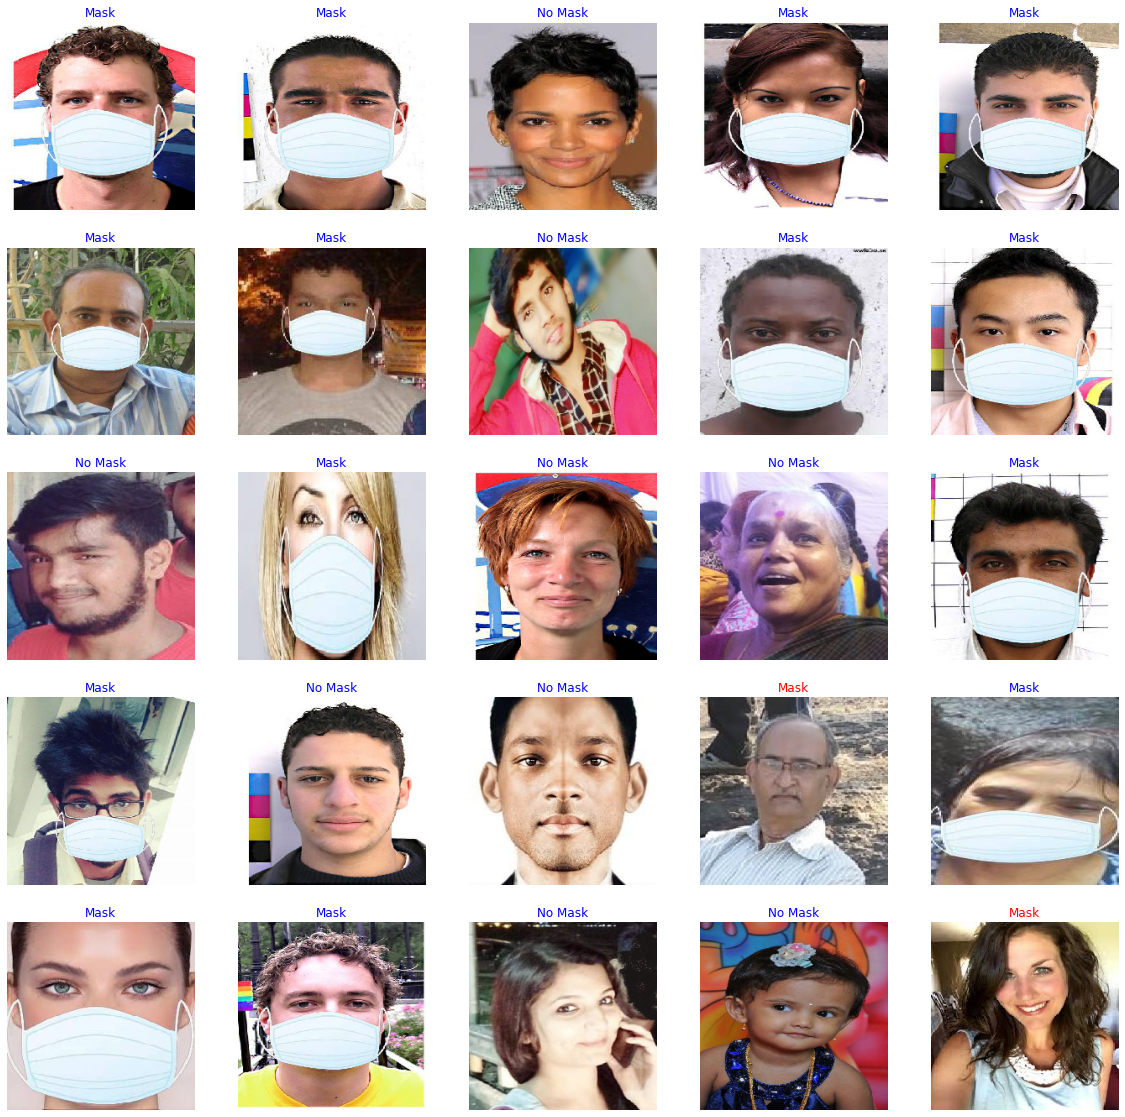

In [42]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title('No Mask' if predictions[i]==1 else "Mask",
             color=('blue' if labels[i]==predictions[i] else 'red'))
    
plt.show()
    